In [1]:
%pylab inline

import gc
import fpfs
import numpy as np
from fpfs import simutil
import scipy.ndimage as ndi
import matplotlib.pylab as plt
import astropy.io.fits as pyfits
from fpfs.imgutil import gauss_kernel
import pdet
import pltutil

Populating the interactive namespace from numpy and matplotlib
Do not have lsst pipeline!


In [7]:
ishear=1
igroup=0
do_plot=False
ngrid=64
if igroup>=0:
    ngal=100
    img1=pyfits.getdata('../../sim/galaxy_basicCenter_psf60/image-%d-g%d-0000.fits' %(igroup,ishear))
    img2=pyfits.getdata('../../sim/galaxy_basicCenter_psf60/image-%d-g%d-2222.fits' %(igroup,ishear))
else:
    ngal=10
    img1=simutil.make_basic_sim('basicCenter_psf60','g%d-0000' %ishear,0,ny=ngal,nx=ngal,do_write=False)
    img2=simutil.make_basic_sim('basicCenter_psf60','g%d-2222' %ishear,0,ny=ngal,nx=ngal,do_write=False)
ngrid2=ngrid*ngal

# PSF
psf=pyfits.getdata('../../sim/galaxy_basic_psf60/psf-60.fits')
npad       =   (ngrid2-psf.shape[0])//2
psfData    =   np.pad(psf,(npad+1,npad),mode='constant')
assert psfData.shape[0]==ngrid2
psfF=np.fft.fft2(np.fft.ifftshift(psfData))
gsigma=3.*2.*np.pi/64
x   = np.fft.fftfreq(ngrid2,1/np.pi/2.)

gKer,grids=gauss_kernel(ngrid2,ngrid2,gsigma,return_grid=True)
k2grid,k1grid=grids

imgF1=np.fft.fft2(img1)/psfF*gKer
imgF2=np.fft.fft2(img2)/psfF*gKer
imgCov1=np.fft.ifft2(imgF1).real
imgCov2=np.fft.ifft2(imgF2).real
gc.collect()

17054

In [11]:
npixt = 1
sizet = 1 + 2 * npixt

footprint = np.zeros((sizet, sizet))
footprint[npixt, npixt] = 1.
footprint[npixt+1, npixt] = -1.
imgCovACov1=ndi.convolve(imgCov1,footprint,mode='constant')
gc.collect()

23

In [12]:
npixt = 1
sizet = 1 + 2 * npixt

footprint = np.zeros((sizet, sizet))
footprint[npixt, npixt] = 1.
footprint[npixt-1, npixt] = -1.
imgCovBCov1=ndi.convolve(imgCov1,footprint,mode='constant')
gc.collect()

23

8041

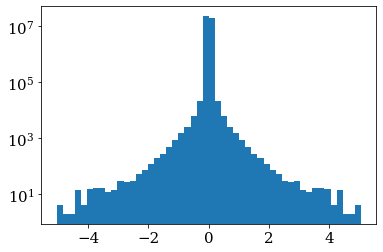

In [21]:
plt.close()
plt.hist(np.ravel(imgCovBCov1),bins=50)
plt.yscale('log')
gc.collect()

2818

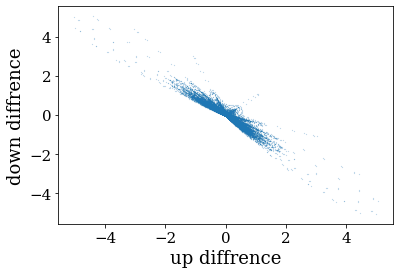

In [30]:
plt.close()
plt.scatter(np.ravel(imgCovACov1[20:4000,20:4000]),np.ravel(imgCovBCov1[20:4000,20:4000]),s=0.01)
plt.xlabel('up diffrence')
plt.ylabel('down diffrence')
gc.collect()

In [26]:
indX=np.arange(32,ngal*64,64)
indY=np.arange(32,ngal*64,64)
inds=np.meshgrid(indY,indX,indexing='ij')
coords   = np.array(np.zeros(inds[0].size),dtype=[('pdet_y','i4'),('pdet_x','i4')])
coords['pdet_y']=np.ravel(inds[0])
coords['pdet_x']=np.ravel(inds[1])

2811

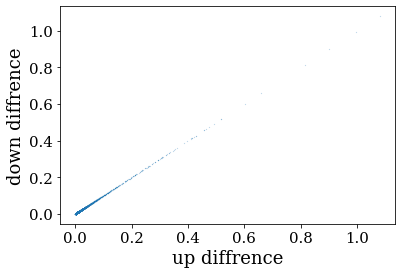

In [31]:
plt.close()
plt.scatter(imgCovACov1[coords['pdet_y'],coords['pdet_x']],imgCovBCov1[coords['pdet_y'],coords['pdet_x']],s=0.01)
plt.xlabel('up diffrence')
plt.ylabel('down diffrence')
gc.collect()